In [2]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("K_means.csv")
df.head()

,name,Age,Income($)
0,Rob,27,70000
1,Micheal,29,90000
2,Mohan,29,61000
3,Ismail,28,150000
4,Kory,42,155000


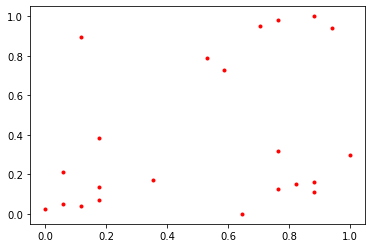

In [4]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
scale.fit(df[['Income($)']])
df['Income($)'] =scale.transform(df[['Income($)']])

scale.fit(df[['Age']])
df["Age"] = scale.transform(df[['Age']])

plt.scatter(df.Age,df["Income($)"],color = "red" , marker =".")

In [5]:

sse = []
k_rng = range(2,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

plt.xlabel("K")
plt.ylabel("sum of error")
plt.plot(k_rng,sse)

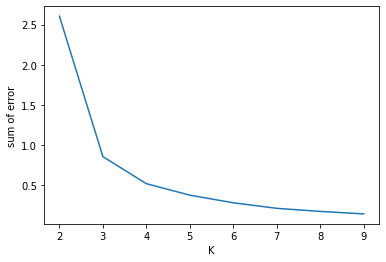

In [6]:
plt.xlabel("K") 
plt.ylabel("sum of error")
plt.plot(k_rng,sse)

In [7]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [8]:
df['cluster'] =y_predicted
df.head()

,name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Micheal,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.897436,1
4,Kory,0.941176,0.940171,1


In [9]:
df = df.drop("name",axis = "columns")
df.head()

,Age,Income($),cluster
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,0
3,0.117647,0.897436,1
4,0.941176,0.940171,1


In [12]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

df0

,Age,Income($),cluster
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,0
11,0.000000,0.025641,0
12,0.058824,0.051282,0
13,0.117647,0.038462,0
14,0.176471,0.068376,0
15,0.352941,0.170940,0


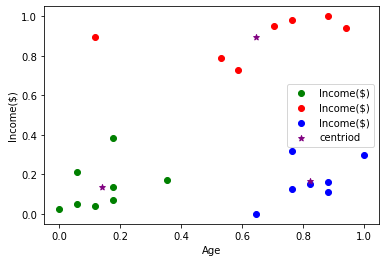

In [21]:
%matplotlib inline
a0 = plt.scatter(df0.Age,df0['Income($)'],color ='green')
a1 = plt.scatter(df1.Age,df1['Income($)'],color ='red')
a2 = plt.scatter(df2.Age,df2['Income($)'],color ='blue')
ac = plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker = '*',color ="purple")
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend([a0,a1,a2,ac],['Income($)','Income($)','Income($)','centriod'])